In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys
sys.path.append("../")
import src.plot as myplot


In [10]:
data = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-0.dat", delimiter=1, dtype=int)

correlation_matrix = np.corrcoef(data.T)


In [13]:
pca = PCA()
pca.fit(correlation_matrix)


eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

(121,)

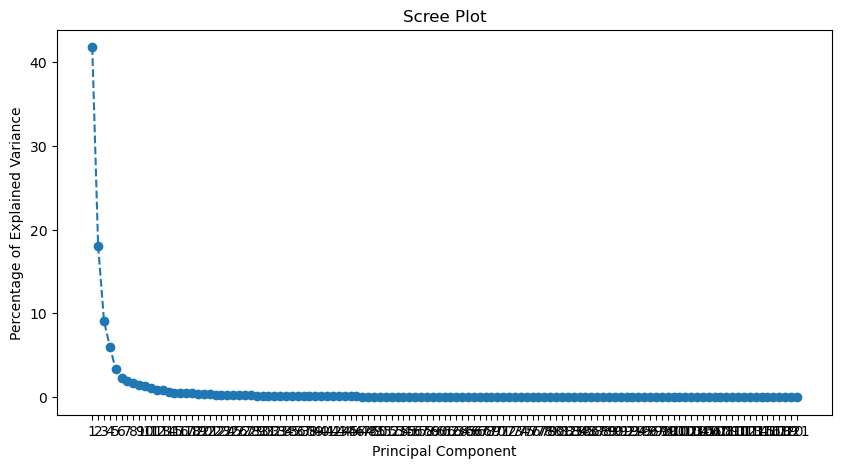

In [16]:
import matplotlib.pyplot as plt

# Assuming 'pca' is your PCA object
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [34]:


# Assuming 'pca' is your PCA object fitted to the data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the desired threshold
threshold = 0.90

# Find the number of components needed to reach the threshold
num_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

print(f"Number of components to explain {threshold*100}% of variance: {num_components}")

Number of components to explain 90.0% of variance: 14


Eigenvectors for the top eigenvalues:


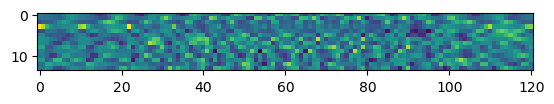

In [35]:
top_eigenvectors = pca.components_[:num_components]


print("Eigenvectors for the top eigenvalues:")
plt.imshow(top_eigenvectors)

In [82]:
def mask_except_k_largest(arr, k, mask_value=0):
    """
    Masks all but the k largest values in a 1D numpy array.
    
    Parameters:
    - arr: Input 1D numpy array.
    - k: Number of largest values to keep.
    - mask_value: Value to replace the masked elements with. Default is 0.
    
    Returns:
    - A numpy array with all but the k largest values masked.
    """
    if k >= arr.size:
        return arr  
    
    kth_largest_value = np.partition(arr, -k)[-k]
    mask = arr < kth_largest_value
    masked_arr = np.copy(arr)  
    masked_arr[mask] = mask_value
    
    return masked_arr



def binary_mask_top_percent(arr, percent):
    k = int(np.ceil(percent * arr.size))
    
    threshold = np.partition(arr, -k)[-k]
    
    mask = arr < threshold
    masked_arr = np.copy(arr)  
    masked_arr[mask] = 0
    return (arr >= threshold).astype(int)


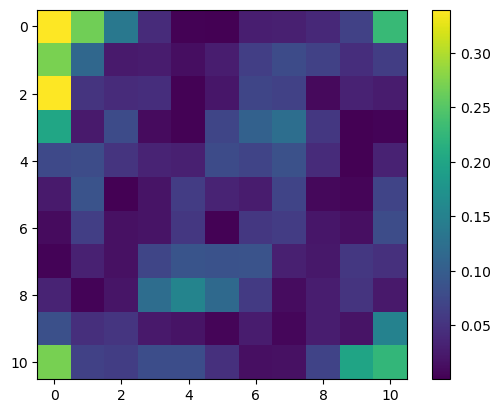

In [108]:
# res = np.abs(top_eigenvectors[0])
# plt.imshow(res.reshape((11,11)))

res = mask_except_k_largest(np.abs(top_eigenvectors[0]), 5)
plt.imshow(res.reshape((11,11)))
plt.imshow(np.abs(top_eigenvectors[3]).reshape((11,11)))
plt.colorbar()

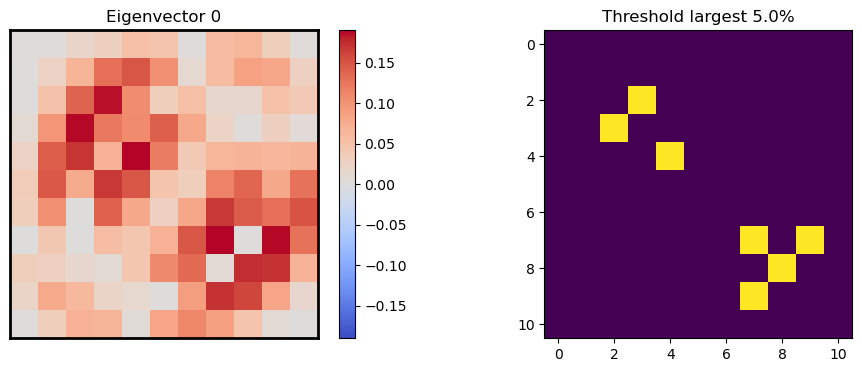

In [139]:
ev = 0
pct = .05
v = top_eigenvectors[ev]
abs_v = np.abs(v)
top_masked = binary_mask_top_percent(abs_v, pct)


fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title(f"Eigenvector {ev}")
# ax[0].imshow(abs_v.reshape((11,11)))
myplot.partition_map(ax[0], abs_v.reshape((11,11)))

ax[1].set_title(f"Threshold largest {pct*100}%")
ax[1].imshow(top_masked.reshape((11,11)))

In [155]:


pct = .05


res = np.apply_along_axis(lambda x : binary_mask_top_percent(np.abs(x), pct),arr=top_eigenvectors, axis=1)


summed_topperc = np.sum(res.T* pca.explained_variance_ratio_[:num_components]*100, axis = 1).reshape((11,11)) # label based on EV




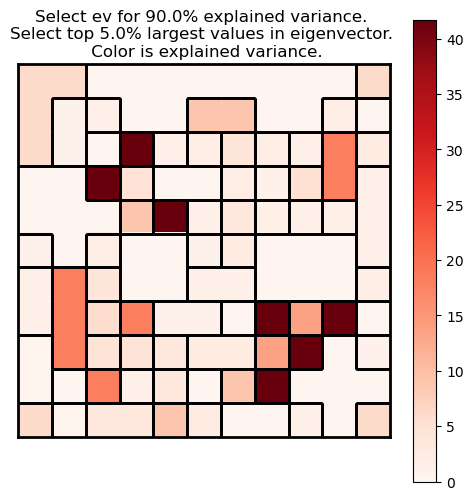

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax = [ax]
ax[0].set_title(f"Select ev for {threshold*100}% explained variance. \nSelect top {pct*100}% largest values in eigenvector. \n Color is % explained variance.")
# ax[0].imshow(abs_v.reshape((11,11)))
im = myplot.partition_map(ax[0], summed_topperc, None, myplot.find_borders(summed_topperc), cbar=True, normalise=False, cmap="Reds")

# ax[1].set_title(f"Threshold largest {pct*100}%")
# ax[1].imshow(top_masked.reshape((11,11)))